In [38]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
from scipy.integrate import odeint
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

## SANS FROTTEMENTS

### Vitesse en fonction de la hauteur de départ dans la pente :

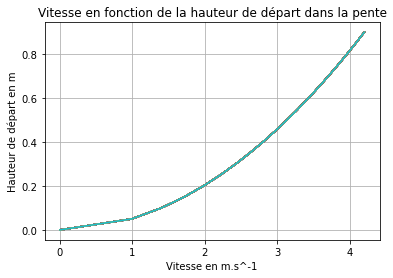

In [39]:
g = 9.81

xalist = np.arange(0, 9, 0.1)
yalist = np.arange(0, 0.93, 0.05)
xa, ya = np.meshgrid(xalist, yalist)

xa = np.sqrt(2*g*ya)

plt.plot(xa, ya)
plt.xlabel("Vitesse en m.s^-1")
plt.ylabel("Hauteur de départ en m")
plt.title("Vitesse en fonction de la hauteur de départ dans la pente")
plt.grid()
plt.show()

### Vitesse et hauteur de départ minimale nécéssaire pour passer le looping :

In [40]:
h = 0.23
R = h/2

vsans = np.sqrt(4*g*R)

print("la vitesse minimale nécéssaire pour passer le looping \n(sans prendre en compte les frottements) est de :", vsans, "m.s-1")
print("\n")

hmina = []

for i in range(19):
    if xa[i, 1] > vsans:
        hmina.append(xa[i, 1])

z = min(hmina)
e = (z**2)/(2*g)
print("la hauteur minimale à laquelle doit débuter le véhicule pour faire le saut \nsans prendre en compte les frottements est (approximativement) :", e, "m")

la vitesse minimale nécéssaire pour passer le looping 
(sans prendre en compte les frottements) est de : 2.1242881160520577 m.s-1


la hauteur minimale à laquelle doit débuter le véhicule pour faire le saut 
sans prendre en compte les frottements est (approximativement) : 0.25 m


### Vitesse à la fin du looping :

In [41]:
vfins = xa[-1, 1]

print("la vitesse de sortie du looping est de :", vfins, "m.s-1")

la vitesse de sortie du looping est de : 4.2021423107743505 m.s-1


Nous avons pu déterminer la vitesse de sortie du looping, sans prendre en compte les frottements, dans le morceau de code ci-dessus, grâce au théorème de l'énergie cinétique. En effet, il suffit de prendre l'énergie cinétique au début du looping et la fin du looping. Sans les frottements, la seul force extérieure intervenant est le poids, or cette force est conservative. Ceci indique que durant tout le long du looping, le poids ne va pas changer. La vitesse perdue au début de la montée sera donc immédiatement regagnée dans la descente. Ainsi la vitesse de sortie du looping sera la même que celle avec laquelle la voiture est arrivée dans celui-ci.

### Equation du mouvement de la voiture lachée dans le ravin (avec vitesse initiale) :

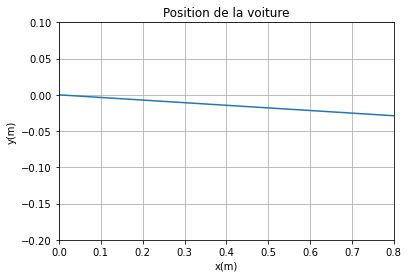

In [42]:
v0 = 4.2
h2 = 0.1 #hauteur du saut
i2 = 0.7 #longueur du saut
B = np.degrees(np.arctan(h2/i2))
sB = np.sin(B)
cB = np.cos(B)
t0 = 0

t = np.linspace(t0, np.pi, 20)
x = np.linspace(0, i2, 20)

yx = [0]*(20)

for i in range(len(t)):
    yx[i] = -1/2*g*(x[i]/(v0*cB))**2+sB*(x[i]/(v0*cB))
       
plt.plot(yx)
plt.title("Position de la voiture")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.xlim(0,0.8)
plt.ylim(-0.2,0.1)
plt.grid()
plt.show()

### Valeur minimale de la vitesse nécessaire pour passer le ravin :

In [43]:
h2 = 0.1 #hauteur du saut
i2 = 0.7 #longueur du saut
B = np.degrees(np.arctan(h2/i2)) #angle de saut               
tB = np.tan(B)
cB = np.cos(B)

vminr = np.sqrt(((g*i2**2)/(2*-cB**2))/(tB*i2-h2))

print("la vitesse minimale à laquelle le véhicule \ndoit faire le saut (sans prendre en compte les frottements) est : ", vminr, "m.s-1")

la vitesse minimale à laquelle le véhicule 
doit faire le saut (sans prendre en compte les frottements) est :  3.546940225864303 m.s-1


## AVEC FROTTEMENTS

### Vitesse en fonction de la hauteur de départ dans la pente :

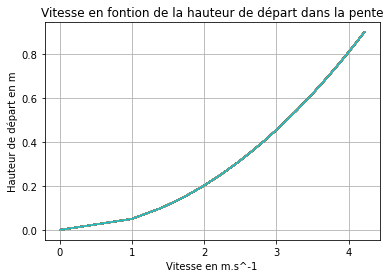

In [44]:
a = 40*(np.pi/180)
C = 0.02 # coefficient de roulement
g = 9.81

xblist = np.arange(0, 9, 0.1)
yblist = np.arange(0, 0.93, 0.05)
xb, yb = np.meshgrid(xblist, yblist)

L = yb/np.sin(a)


xb = np.sqrt(2*g*yb+C*g*np.cos(a)*yb)

plt.plot(xb, yb)
plt.xlabel("Vitesse en m.s^-1")
plt.ylabel("Hauteur de départ en m")
plt.title("Vitesse en fontion de la hauteur de départ dans la pente")
plt.grid()
plt.show()

### Vitesse minimale nécéssaire pour passer le looping :

La vitesse minimale pour franchir le looping est de: 2.24 m/s


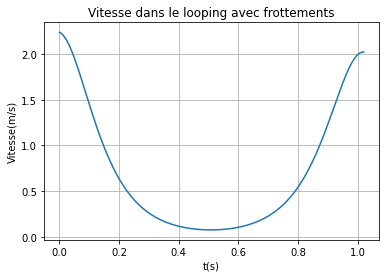

la vitesse de sortie du looping est de : 2.0226834234927367 m/s


In [45]:
#Importation des bibliothèques que nous allons utiliser
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

P = 1.292           #Densité de l'air
Cx = 0.033          #Cx d'une bonne voiture
Sx = 0.045          #Surface de face de la voiture si on pose notre voiture comme un pavé droit
m = 0.03            #Masse de la voiture
g = 9.81            #Constante gravitationelle
u = 0.00105         #coefficient de roulement 
r = 0.115           #rayon du looping

theta = 2.24/r      #vitesse angulaire à déterminer par expérimentation

#Déclaration de la fonction
def vecteurPositionVitessePrime(vecteurPositionVitesse, t):
    dydt = [vecteurPositionVitesse[1],-g/r*np.sin(vecteurPositionVitesse[0])-u*g/r*np.cos(vecteurPositionVitesse[0])+vecteurPositionVitesse[1]**2*(-u-(P*Sx*Cx)/(2*m))]
    return dydt

vecteurPositionVitesseInitiales=[0,theta]
t=np.linspace(0,1.02,1000)

#Résolution
vecteurPositionVitesse = odeint(vecteurPositionVitessePrime,vecteurPositionVitesseInitiales,t)

print("La vitesse minimale pour franchir le looping est de:", theta*r, "m/s")

plt.plot(t, vecteurPositionVitesse[:,1]*r)
plt.title("Vitesse dans le looping avec frottements")
plt.xlabel("t(s)")
plt.ylabel("Vitesse(m/s)")
plt.grid()
plt.show()

vouta = vecteurPositionVitesse[-1][1]*r
print("la vitesse de sortie du looping est de :", vouta, "m/s")

### Hauteur minimale pour franchir le looping
#### Connaissant déjà la vitesse minimale afin de franchir le looping et la vitesse en sortie de pente en fonction de la hauteur nous faison juste une analyse graphique de la hauteur nécessaire pour atteindre la vitesse de 2.24m/s

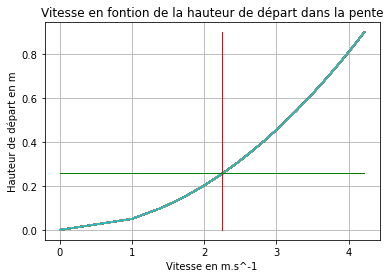

Il faudrait donc que la voiture parte d'une hauteur de 0.26m afin d'atteindre les 2.24m/s nécessaires au franchissement du looping.


In [46]:
a = 40*(np.pi/180)
C = 0.02 #Coefficient de roulement
g = 9.81

xblist = np.arange(0, 9, 0.1)
yblist = np.arange(0, 0.93, 0.05)
xb, yb = np.meshgrid(xblist, yblist)

L = yb/np.sin(a)


xb = np.sqrt(2*g*yb+C*g*np.cos(a)*yb)

plt.plot(xb, yb)
plt.plot([2.24]*19,yb,color="red", lw=1)          #Vitesse minimale d'entrée dans le looping
plt.plot(xb,[0.26]*19, color="green", lw=1)       #Raisonnement à taton pour obtenir la hauteur minimale
plt.xlabel("Vitesse en m.s^-1")
plt.ylabel("Hauteur de départ en m")
plt.title("Vitesse en fontion de la hauteur de départ dans la pente")
plt.grid()
plt.show()

print("Il faudrait donc que la voiture parte d'une hauteur de 0.26m afin d'atteindre les 2.24m/s nécessaires au franchissement du looping.")

### Vitesse minimale nécessaire pour faire le saut du ravin et équations de mouvement de la voiture dans le ravin (avec vitesse initiale) :

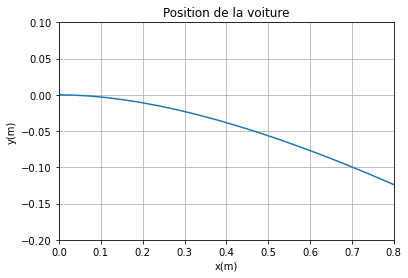

On observe donc que pour une vitesse de 3.6 m/s la voiture peut franchir le ravin


In [47]:
alpha=0*np.pi/180   #angle
P = 1.292           #Densité de l'air
Sx = 4.5            #Surface de face de la voiture si on pose notre voiture comme un pavé droit
Sy = 21.5           #Surface du dessous de la voiture si on pose notre voiture comme un pavé droit
Cx = 0.33           #Cx d'une bonne voiture
Cy = 0.1            #Cy d'une bonne voiture
m = 0.03            #Masse de la voiture

v0 = 3.6            #Vitesse initiale à déterminer par expérimentation(à taton)

#On veut trouver x’(t) et y’(t) grâce à x’’(t) et y’’(t) et grâce à la fonction odeint résolution d’une équation différentielle linéaire du 1er ordre.
#Déclaration de la fonction x’’ en fonction de x’ et t
def xpp(t,xp):
    return (1/2)*P*Sx*Cx*v0**2

#Déclaration de la fonction y’’ en fonction de y’ et t
def ypp(t,yp):
    return -9.81+(1/2)*P*Sy*Cy*v0

#Déclaration des conditions initiales et du pas de temps de calcul (t varie de 0 à Pi)
xp0=0
yp0=0
t0=0
t=np.linspace(t0,np.pi,100)

xp=odeint(xpp,xp0,t)
yp=odeint(ypp,yp0,t)

#Déclaration de la fonction
def vecteurPositionVitessePrime(vecteurPositionVitesse, t):
    dydt = [vecteurPositionVitesse[2],vecteurPositionVitesse[3],(1/2)*P*Sx*Cx*v0**2,-9.81+(1/2)*P*Sy*Cy]
    return dydt

vecteurPositionVitesseInitiales=[0,0,v0*cos(alpha),v0*sin(alpha)]
t0=0;
t=np.linspace(t0,2,200)

#Résolution
vecteurPositionVitesse=odeint(vecteurPositionVitessePrime,vecteurPositionVitesseInitiales,t)

#Tracé du graphique de l'évolution de la position de la voiture sur x et y
plt.plot(vecteurPositionVitesse[:,0], vecteurPositionVitesse[:,1])
plt.title("Position de la voiture")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.xlim(0,0.8)
plt.ylim(-0.2,0.1)
plt.grid()
plt.show()

print("On observe donc que pour une vitesse de", v0, "m/s la voiture peut franchir le ravin")

#### Nous avons calculé la vitesse initiale nécessaire pour passer le ravin et nous avons trouvé 3.6 m/s, or avec la vitesse de sortie du looping trouvée dans la partie de code du dessus, nous avons nous rendons compte que la voiture ne peut pas passer le ravin.

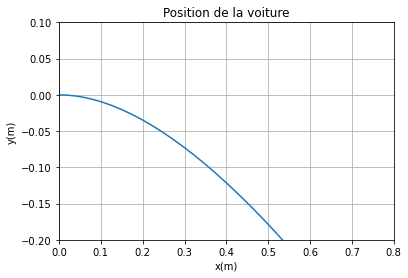

On observe donc que pour une vitesse de 2.0226834234927367 m/s la voiture ne peut pas franchir le ravin


In [48]:
alpha=0*np.pi/180   #angle
P = 1.292           #Densité de l'air
Sx = 4.5            #Surface de face de la voiture si on pose notre voiture comme un pavé droit
Sy = 21.5           #Surface du dessous de la voiture si on pose notre voiture comme un pavé droit
Cx = 0.33           #Cx d'une bonne voiture
Cy = 0.1            #Cy d'une bonne voiture
m = 0.03            #Masse de la voiture

v0 = vouta            #Vitesse initiale à déterminer par expérimentation(à taton)

#On veut trouver x’(t) et y’(t) grâce à x’’(t) et y’’(t) et grâce à la fonction odeint résolution d’une équation différentielle linéaire du 1er ordre.
#Déclaration de la fonction x’’ en fonction de x’ et t
def xpp(t,xp):
    return (1/2)*P*Sx*Cx*v0**2

#Déclaration de la fonction y’’ en fonction de y’ et t
def ypp(t,yp):
    return -9.81+(1/2)*P*Sy*Cy*v0

#Déclaration des conditions initiales et du pas de temps de calcul (t varie de 0 à Pi)
xp0=0
yp0=0
t0=0
t=np.linspace(t0,np.pi,100)

xp=odeint(xpp,xp0,t)
yp=odeint(ypp,yp0,t)

#Déclaration de la fonction
def vecteurPositionVitessePrime(vecteurPositionVitesse, t):
    dydt = [vecteurPositionVitesse[2],vecteurPositionVitesse[3],(1/2)*P*Sx*Cx*v0**2,-9.81+(1/2)*P*Sy*Cy]
    return dydt

vecteurPositionVitesseInitiales=[0,0,v0*cos(alpha),v0*sin(alpha)]
t0=0;
t=np.linspace(t0,2,200)

#Résolution
vecteurPositionVitesse=odeint(vecteurPositionVitessePrime,vecteurPositionVitesseInitiales,t)

#Tracé du graphique de l'évolution de la position de la voiture sur x et y
plt.plot(vecteurPositionVitesse[:,0], vecteurPositionVitesse[:,1])
plt.title("Position de la voiture")
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.xlim(0,0.8)
plt.ylim(-0.2,0.1)
plt.grid()
plt.show()

print("On observe donc que pour une vitesse de", v0, "m/s la voiture ne peut pas franchir le ravin")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#  - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  

### Nous allons maintenant étudier l'influence des différents paramètres sur le résultat des différentes vitesses. 

Nous allons essayer de faire varier les paramètres que nous avons définis depuis le début du livrable.
Pour se faire nous allons réécrire le programme en permettant de changer les valeurs des paramètres grâce à une commande input.

entrez une valeur pour la constante de gravitation (g)
9.81


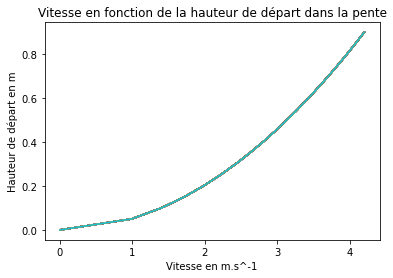

entrez une valeur pour le diamètre du looping (h)
0.3
la vitesse minimale nécéssaire pour passer le looping 
(sans prendre en compte les frottements) est de : 2.4261079942986874 m.s-1
 ou 8.733988779475276 en km/h

la hauteur minimale à laquelle doit débuter le véhicule pour faire le saut 
sans prendre en compte les frottements est (approximativement) : 0.3000000000000001 m
la vitesse de sortie du looping est de : 4.2021423107743505 m.s-1
entrez une valeur pour la hauteur
12
entrez une valeur pour la longueur
32
la vitesse minimale à laquelle le véhicule 
doit faire le saut (sans prendre en compte les frottements) est :  33.37684771828226 m.s-1


In [49]:
# étude de l'influence des différents paramètres sur le résultat de la vitesse en fonction de la hauteur (sans frottements)

g = float(input("entrez une valeur pour la constante de gravitation (g)\n"))

xalist = np.arange(0, 9, 0.1)
yalist = np.arange(0, 0.93, 0.05)
xa, ya = np.meshgrid(xalist, yalist)

xa = np.sqrt(2*g*ya)

plt.plot(xa, ya)
plt.xlabel("Vitesse en m.s^-1")
plt.ylabel("Hauteur de départ en m")
plt.title("Vitesse en fonction de la hauteur de départ dans la pente")
plt.show()

# étude de l'influence des différents paramètres sur le résultat de la vitesse minimale nécéssaire à passer le looping (sans frottements)

h = float(input("entrez une valeur pour le diamètre du looping (h)\n"))
R = h/2

vsans = np.sqrt(4*g*R)

print("la vitesse minimale nécéssaire pour passer le looping \n(sans prendre en compte les frottements) est de :", vsans, "m.s-1\n", "ou", vsans*3.6, "en km/h\n")

# étude de l'influence des différents paramètres sur la hauteur de départ nécéssaire pour passer le looping (sans frottements)

hmina = []

for i in range(19):
#    print(xa[i, 1])
#    print(vsans, "\n")
    if xa[i, 1] > vsans:
        hmina.append(xa[i, 1])

if len(hmina) == 0:
    print("impossible : le diamètre choisi pour le looping est trop grand pour que celui-ci puisse être passé\n")
    print("puisque la voiture n'a pas réussi à passer le looping, sa course s'arrête ici...")
else:
    z = min(hmina)
    e = (z**2)/(2*g)
    print("la hauteur minimale à laquelle doit débuter le véhicule pour faire le saut \nsans prendre en compte les frottements est (approximativement) :", e, "m")
    
    # vitesse de sortie du looping    
    
    vfins = xa[-1, 1]

    print("la vitesse de sortie du looping est de :", vfins, "m.s-1")    
    
    # étude de l'influence des différents paramètres sur la vitesse nécessaire pour franchir le ravin sans prendre en compte les frottements

    h2 = float(input("entrez une valeur pour la hauteur\n")) #hauteur du saut
    i2 = float(input("entrez une valeur pour la longueur\n")) #longueur du saut
    B = np.degrees(np.arctan(h2/i2)) #angle de saut               
    tB = np.tan(B)
    cB = np.cos(B)
    
    vminr = np.sqrt(((g*i2**2)/(2*-cB**2))/(tB*i2-h2))

    print("la vitesse minimale à laquelle le véhicule \ndoit faire le saut (sans prendre en compte les frottements) est : ", vminr, "m.s-1")


#### On remarque grâce au code ci-dessus que lorsque on change la valeur de la constante de gravitation (g), la vitesse change : plus elle est petite plus basse est la vitesse en fonction de la hauteur, plus elle est grande plus haute est la vitesse en fonction de la hauteur.
#### On peut également changer la taille du diamètre du looping. Si celle-ci est trop élevée, la voiture ne passera pas le looping et ne pourra donc pas aller jusqu'a la fin du parcours.
#### Pour la fin du parcours, on peut également changer la hauteur et la longueur du ravin. Plus les dimension sont grandes et plus la vitesse nécessaire pour passer ce dernier sera élevée.